In [1]:
getwd()

[1] "/home/mo/SPCA"

In [2]:
install.packages("sparsepca",lib='/home/mo/SPCA')
install.packages("ggplot2",lib='/home/mo/SPCA')
install.packages("reshape2",lib='/home/mo/SPCA')
install.packages("corrplot",lib='/home/mo/SPCA')
install.packages("VIF",lib='/home/mo/SPCA')
install.packages("dplyr",lib='/home/mo/SPCA')

also installing the dependency ‘scales’

Warning message in install.packages("ggplot2", lib = "/home/mo/SPCA"):
“installation of package ‘scales’ had non-zero exit status”Warning message in install.packages("ggplot2", lib = "/home/mo/SPCA"):
“installation of package ‘ggplot2’ had non-zero exit status”also installing the dependencies ‘stringi’, ‘stringr’

Warning message in install.packages("reshape2", lib = "/home/mo/SPCA"):
“installation of package ‘stringi’ had non-zero exit status”Warning message in install.packages("reshape2", lib = "/home/mo/SPCA"):
“installation of package ‘stringr’ had non-zero exit status”Warning message in install.packages("reshape2", lib = "/home/mo/SPCA"):
“installation of package ‘reshape2’ had non-zero exit status”Warning message in install.packages("dplyr", lib = "/home/mo/SPCA"):
“installation of package ‘dplyr’ had non-zero exit status”

In [3]:
#library("reshape2")
library(corrplot,lib='/home/mo/SPCA')
library("sparsepca",lib='/home/mo/SPCA')

corrplot 0.92 loaded


In [82]:
data <- read.csv(file = '/home/mo/SPCA/Ali/env_vars_reduced.csv')

data = subset(data, select = -c(X) )

In [83]:
head(data)

X24003..Nitrogen.dioxide.air.pollution..2010,X24004..Nitrogen.oxides.air.pollution..2010,X24005..Particulate.matter.air.pollution..pm10...2010,X24006..Particulate.matter.air.pollution..pm2.5...2010,X24008..Particulate.matter.air.pollution.2.5.10um..2010,X24009..Traffic.intensity.on.the.nearest.road,X24011..Traffic.intensity.on.the.nearest.major.road,X24015..Sum.of.road.length.of.major.roads.within.100m,X24020..Average.daytime.sound.level.of.noise.pollution,X24021..Average.evening.sound.level.of.noise.pollution,X24022..Average.night.time.sound.level.of.noise.pollution,X24504...Domestic.garden.percentage..buffer.300m,X24502...Water.percentage..buffer.1000m,X24501...Domestic.garden.percentage..buffer.1000m,X24505...Water.percentage..buffer.300m,X24507...Natural.environment.percentage..buffer.300m,X24508...Distance..Euclidean..to.coast,X24503...Greenspace.percentage..buffer.300m,X24506...Natural.environment.percentage..buffer.1000m,X24500...Greenspace.percentage..buffer.1000m
0.64711798,0.6421353,-0.9327977,0.40026870,-0.8298790,-0.2009958,-0.3620722,-0.3620157,0.3829911,0.3839062,0.3829672,-1.07384706,-0.45419398,0.68454935,-0.2680992,-0.8097495,-1.3019420,0.7170425,-0.9967235,-0.81986734
0.35394158,0.1279315,-0.1581679,-0.02296576,-0.4479744,-0.2009958,-0.4332477,-0.3620157,-0.1689081,-0.1679924,-0.1689346,0.03786374,-0.23426157,-0.09781911,-0.2594486,-0.3683271,-1.3876637,-0.2393606,-0.7373709,-0.70366406
0.92968166,1.0990608,1.5727291,1.55454452,1.5401761,-0.2009958,2.0755451,-0.3620157,0.5905429,0.5914578,0.5905200,0.54264201,-0.03550784,0.16258512,-0.1289978,-0.9245249,0.3181112,-1.0818424,-0.7986980,-0.65841964
-0.16342853,0.1071030,-0.7084222,0.83312213,-0.6164617,-0.2009958,-0.3619783,-0.3620157,-0.4094795,-0.4109221,-0.4095072,-0.48421265,-0.07582879,-0.96073597,-0.2016627,0.7263497,-0.1833810,0.6683796,0.6999528,0.85203697
0.05413224,0.2952105,-0.3772012,-0.34039161,-0.8411115,-0.2009958,-0.1670910,-0.3620157,-0.2703254,-0.2717682,-0.2703524,0.61271984,-0.41387303,0.51260610,-0.2379952,-0.7567915,-1.2846260,-0.3629194,-0.1091587,-0.16849658
-0.24567711,-0.1252651,-0.1474834,-0.09029852,-0.6613917,-0.2009958,-0.4271912,-0.3620157,-0.2349473,-0.2340315,-0.2349741,2.15245700,-0.04202436,0.39685113,-0.2805560,-1.0216212,0.3287471,-1.2962012,0.1649405,-0.02411435


In [84]:
dim(data)

[1] 379690     20

In [85]:
#parameters=seq(0,1e-3,by=2e-5)
parameters=seq(0,15e-5,by=5e-6)

sum_mat <- matrix(nrow=6,ncol=length(parameters),byrow=TRUE)
colnames(sum_mat) <- parameters
rownames(sum_mat) <- c('max nnz loadings','median #var in pc','max #var in pc','num PCs','mean Corr','Max Corr')


for(cnt in 1:length(parameters)){
    print(cnt)
    
    parameter=parameters[cnt]
    spca.results <- spca(data, k=40, alpha=parameter, beta=0,max_iter=10000, center=TRUE, scale=FALSE)
    largest_pc_num=which(summary(spca.results)[4,]>0.90)[1] #the number of pcs required to explain 95% of variance
    #the number of nonzero loadings - input var coefficients- for each PC
    sum_mat[1,cnt] <- max(colSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))

    # the number of times an input var has been included in a PC
    sum_mat[2,cnt] <- median(rowSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))
    sum_mat[3,cnt] <- max(rowSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))
    sum_mat[4,cnt] <-  largest_pc_num
    M <- cor(spca.results$scores[,1:largest_pc_num],method='pearson')
    sum_mat[5,cnt] <- mean(M)
    sum_mat[6,cnt] <- max(M[M<1])
    }

[1] 1
[1] "Iteration:    1, Objective: 5.40186e-24, Relative improvement Inf"
[1] 2
[1] "Iteration:    1, Objective: 7.38771e+02, Relative improvement Inf"
[1] "Iteration:   11, Objective: 7.38611e+02, Relative improvement 1.87160e-05"
[1] "Iteration:   21, Objective: 7.38486e+02, Relative improvement 1.58781e-05"
[1] "Iteration:   31, Objective: 7.38375e+02, Relative improvement 1.43658e-05"
[1] "Iteration:   41, Objective: 7.38273e+02, Relative improvement 1.34145e-05"
[1] "Iteration:   51, Objective: 7.38177e+02, Relative improvement 1.27609e-05"
[1] "Iteration:   61, Objective: 7.38085e+02, Relative improvement 1.22848e-05"
[1] "Iteration:   71, Objective: 7.37996e+02, Relative improvement 1.19229e-05"
[1] "Iteration:   81, Objective: 7.37909e+02, Relative improvement 1.16388e-05"
[1] "Iteration:   91, Objective: 7.37824e+02, Relative improvement 1.14099e-05"
[1] "Iteration:  101, Objective: 7.37741e+02, Relative improvement 1.12218e-05"
[1] "Iteration:  111, Objective: 7.37658e+02

In [88]:
sum_mat

,0,5e-06,1e-05,1.5e-05,2e-05,2.5e-05,3e-05,3.5e-05,4e-05,4.5e-05,...,0.000105,0.00011,0.000115,0.00012,0.000125,0.00013,0.000135,0.00014,0.000145,0.00015
max nnz loadings,2.000000e+01,20.000000000,19.0000000,17.0000000,17.0000000,17.0000000,9.0000000,11.0000000,11.0000000,10.0000000,...,6.0000000,6.0000000,6.0000000,5.0000000,5.0000000,5.0000000,4.0000000,4.0000000,4.0000000,4.0000000
median #var in pc,7.000000e+00,7.000000000,5.5000000,4.0000000,4.0000000,3.0000000,2.0000000,2.0000000,2.0000000,2.0000000,...,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
max #var in pc,7.000000e+00,7.000000000,7.0000000,6.0000000,6.0000000,5.0000000,3.0000000,4.0000000,3.0000000,3.0000000,...,2.0000000,2.0000000,2.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000
num PCs,7.000000e+00,7.000000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,...,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000,7.0000000
mean Corr,1.428571e-01,0.142659372,0.1292620,0.1257480,0.1250183,0.1236563,0.1196749,0.1195254,0.1192155,0.1189680,...,0.1150873,0.1136616,0.1120508,0.1118795,0.1119914,0.1119931,0.1120842,0.1122148,0.1123696,0.1125474
Max Corr,3.411568e-16,0.003139277,0.1650862,0.1973647,0.2180192,0.2443243,0.2562696,0.2376718,0.2477715,0.2698079,...,0.3261577,0.3340993,0.3425830,0.3526588,0.3645608,0.3691907,0.3745900,0.3806804,0.3873289,0.3945263


In [89]:
write.csv(sum_mat, file="sum_results_vifHTF.csv")

# This if for 2-d grid search in alpha and beta, it showed (confirmed) that beta is somewhat irrelevant, since we'd like to have many zero loadings, L1 norm is more useful

In [ ]:
"alpha=seq(0,1e-3,by=1e-4)
beta=seq(0,6e-3,by=2e-3)

sum_mat1 <- matrix(nrow=length(alpha),ncol=length(beta),byrow=TRUE)
sum_mat2 <- matrix(nrow=length(alpha),ncol=length(beta),byrow=TRUE)
sum_mat3 <- matrix(nrow=length(alpha),ncol=length(beta),byrow=TRUE)
sum_mat4 <- matrix(nrow=length(alpha),ncol=length(beta),byrow=TRUE)
sum_mat5 <- matrix(nrow=length(alpha),ncol=length(beta),byrow=TRUE)
sum_mat6 <- matrix(nrow=length(alpha),ncol=length(beta),byrow=TRUE)

#colnames(sum_mat) <- parameters
#rownames(sum_mat) <- c('max nnz loadings','median #var in pc','max #var in pc','num PCs','mean Corr','Max Corr')


for(cnt in 1:length(alpha)){
    print(cnt)
    for(cnt2 in 1:length(beta)){
        spca.results <- spca(data, k=40,max_iter=10000, alpha=alpha[cnt], beta=beta[cnt2], center=FALSE, scale=FALSE)
        largest_pc_num=which(summary(spca.results)[4,]>0.80)[1] #the number of pcs required to explain 95% of variance
        #the number of nonzero loadings - input var coefficients- for each PC
        sum_mat1[cnt,cnt2] <- max(colSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))

        # the number of times an input var has been included in a PC
        sum_mat2[cnt,cnt2] <- median(rowSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))
        sum_mat3[cnt,cnt2] <- max(rowSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))
        sum_mat4[cnt,cnt2] <-  largest_pc_num
        M <- cor(spca.results$scores[,1:largest_pc_num],method='pearson')
        sum_mat5[cnt,cnt2] <- mean(M)
        sum_mat6[cnt,cnt2] <- max(M[M<1])        
    }
    }"

In [ ]:
sum_mat6

In [ ]:

#write.csv(sum_mat1, file="sum_results1.csv")
#write.csv(sum_mat2, file="sum_results2.csv")
#write.csv(sum_mat3, file="sum_results3.csv")
#write.csv(sum_mat4, file="sum_results4.csv")
#write.csv(sum_mat5, file="sum_results5.csv")
#write.csv(sum_mat6, file="sum_results6.csv")


In [101]:
parameter=0.00012
spca.results <- spca(data, k=40, alpha=parameter,  max_iter=10000, beta=0, center=TRUE, scale=FALSE)
largest_pc_num=which(summary(spca.results)[4,]>0.90)[1] #the number of pcs required to explain 95% of variance
#the number of nonzero loadings - input var coefficients- for each PC
max_num_nnz_loadings <- max(colSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))

# the number of times an input var has been included in a PC
median_times_input_presented <- median(rowSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))
max_times_input_presented <- max(rowSums(((spca.results$loadings>1e-4) | (spca.results$loadings< -1e-4))[,1:largest_pc_num]))

[1] "Iteration:    1, Objective: 1.77190e+04, Relative improvement Inf"
[1] "Iteration:   11, Objective: 1.76268e+04, Relative improvement 4.50893e-04"
[1] "Iteration:   21, Objective: 1.75560e+04, Relative improvement 3.76221e-04"
[1] "Iteration:   31, Objective: 1.74939e+04, Relative improvement 3.36191e-04"
[1] "Iteration:   41, Objective: 1.74385e+04, Relative improvement 3.06353e-04"
[1] "Iteration:   51, Objective: 1.73871e+04, Relative improvement 2.86897e-04"
[1] "Iteration:   61, Objective: 1.73389e+04, Relative improvement 2.70983e-04"
[1] "Iteration:   71, Objective: 1.72928e+04, Relative improvement 2.62118e-04"
[1] "Iteration:   81, Objective: 1.72480e+04, Relative improvement 2.57226e-04"
[1] "Iteration:   91, Objective: 1.72040e+04, Relative improvement 2.53856e-04"
[1] "Iteration:  101, Objective: 1.71608e+04, Relative improvement 2.50786e-04"
[1] "Iteration:  111, Objective: 1.71180e+04, Relative improvement 2.47943e-04"
[1] "Iteration:  121, Objective: 1.70758e+04, Re

In [102]:
summary(spca.results)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Explained variance,6.698,4.358,2.096,1.300,0.943,0.820,0.542,0.480,0.303,0.229,0.172,0.164,0.121,0.106,0.052,0.041,0.030,0.012,0.000,0.000
Standard deviations,2.588,2.088,1.448,1.140,0.971,0.905,0.736,0.693,0.550,0.479,0.414,0.404,0.349,0.326,0.227,0.203,0.173,0.111,0.000,0.000
Proportion of variance,0.362,0.236,0.113,0.070,0.051,0.044,0.029,0.026,0.016,0.012,0.009,0.009,0.007,0.006,0.003,0.002,0.002,0.001,0.000,0.000
Cumulative proportion,0.362,0.598,0.711,0.782,0.833,0.877,0.906,0.932,0.949,0.961,0.970,0.979,0.986,0.992,0.994,0.997,0.998,0.999,0.999,0.999


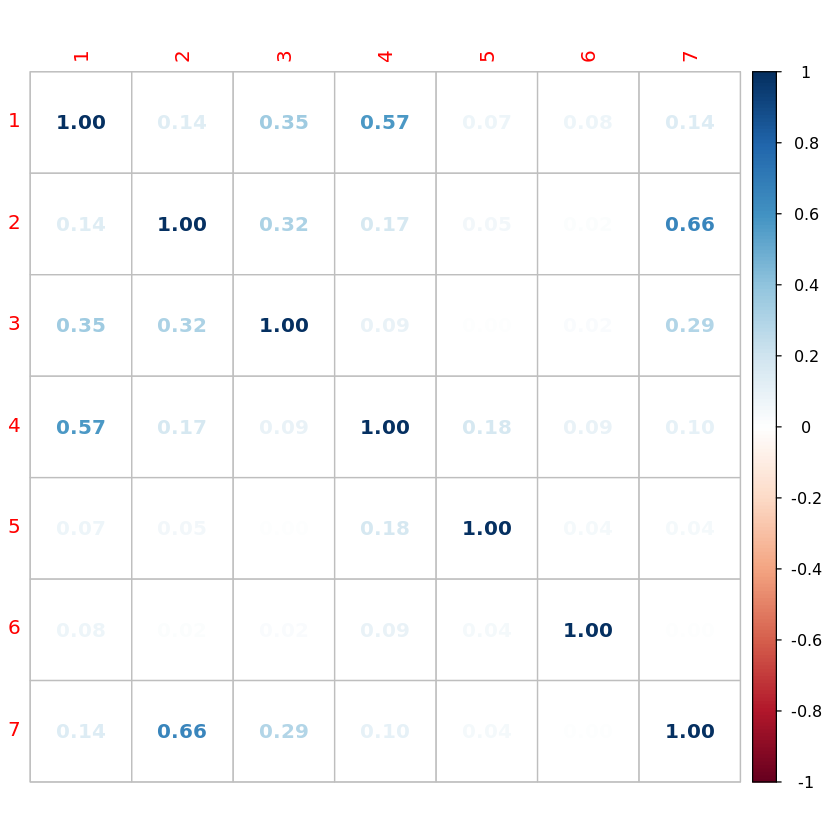

In [103]:
M <- cor(spca.results$scores[,1:largest_pc_num],method='pearson')

corrplot(abs(M), method="number")

In [104]:
max(M[M<1])

[1] 0.3526588

In [105]:
summary(spca.results)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Explained variance,6.698,4.358,2.096,1.300,0.943,0.820,0.542,0.480,0.303,0.229,0.172,0.164,0.121,0.106,0.052,0.041,0.030,0.012,0.000,0.000
Standard deviations,2.588,2.088,1.448,1.140,0.971,0.905,0.736,0.693,0.550,0.479,0.414,0.404,0.349,0.326,0.227,0.203,0.173,0.111,0.000,0.000
Proportion of variance,0.362,0.236,0.113,0.070,0.051,0.044,0.029,0.026,0.016,0.012,0.009,0.009,0.007,0.006,0.003,0.002,0.002,0.001,0.000,0.000
Cumulative proportion,0.362,0.598,0.711,0.782,0.833,0.877,0.906,0.932,0.949,0.961,0.970,0.979,0.986,0.992,0.994,0.997,0.998,0.999,0.999,0.999


In [106]:
df_scores=as.data.frame(spca.results$scores[,1:largest_pc_num])

In [107]:
as.matrix(df_scores)[11]

[1] -1.610391

In [108]:
mean(as.matrix(df_scores))

[1] 5.718235e-18

In [109]:
dim(df_scores)

[1] 379690      7

In [110]:
write.csv(spca.results$loadings[,1:largest_pc_num], file="SPCs_loadingsResp2_lambda12e-5.csv")

In [111]:
write.csv(spca.results$score[,1:largest_pc_num], file="SPCs_scoresResp2_lambda12e-5.csv")